In [83]:
## Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


import warnings
warnings.simplefilter("ignore")


In [84]:
data = pd.read_csv('census_income.csv')
pd.set_option('display.max_columns', None)
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [86]:
data.isna().mean(axis=0)  

# since all have data more than 40%, can't drop any column

# NO NAN data

Age               0.0
Workclass         0.0
Fnlwgt            0.0
Education         0.0
Education_num     0.0
Marital_status    0.0
Occupation        0.0
Relationship      0.0
Race              0.0
Sex               0.0
Capital_gain      0.0
Capital_loss      0.0
Hours_per_week    0.0
Native_country    0.0
Income            0.0
dtype: float64

In [87]:
data.columns.to_series().groupby(data.dtypes).groups

{int64: ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week'], object: ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']}

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### Representations and Analysis

Text(0, 0.5, 'Count')

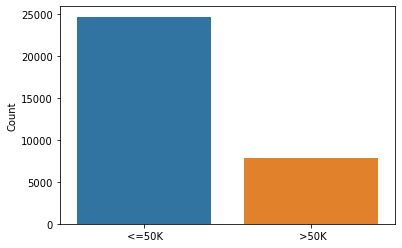

In [89]:
sns.barplot(x=data['Income'].value_counts().index,y=data['Income'].value_counts())
plt.ylabel('Count')

Text(0, 0.5, 'Count')

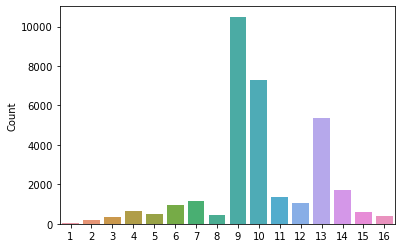

In [90]:
sns.barplot(x=data['Education_num'].value_counts().index,y=data['Education_num'].value_counts())
plt.ylabel('Count')

#### Handling Categorical Data

In [91]:
data['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [92]:
# One-HOt Encoder
Workclass_n=pd.get_dummies(data.Workclass,drop_first=True)
Workclass_n

,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
32555,0,0,0,1,0,0,0,0
32556,0,0,0,1,0,0,0,0
32557,0,0,0,1,0,0,0,0
32558,0,0,0,1,0,0,0,0


In [93]:
data['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [94]:
# Label-Encoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
data['Education_cat'] = labelencoder.fit_transform(data['Education'])
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Education_cat
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,9
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,11
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,9
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,7
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,11
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,11
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,11


In [95]:
data['Marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [96]:
# Label-Encoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
data['Marital_status_cat'] = labelencoder.fit_transform(data['Marital_status'])
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Education_cat,Marital_status_cat
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,9,2
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,11,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1,2
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,9,2
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,7,2
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,11,2
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,11,6
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,11,4


In [97]:
data['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [98]:
# Label-Encoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
data['Occupation_cat'] = labelencoder.fit_transform(data['Occupation'])
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Education_cat,Marital_status_cat,Occupation_cat
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,9,2,4
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,11,0,6
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1,2,6
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,9,2,10
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,12,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,7,2,13
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,11,2,7
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,11,6,1
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,11,4,1


In [99]:
data['Relationship'].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [100]:
# Label-Encoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
data['Relationship_cat'] = labelencoder.fit_transform(data['Relationship'])
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Education_cat,Marital_status_cat,Occupation_cat,Relationship_cat
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,9,2,4,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,11,0,6,1
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1,2,6,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,9,2,10,5
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,12,2,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,7,2,13,5
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,11,2,7,0
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,11,6,1,4
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,11,4,1,3


In [101]:
data['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [102]:
# Label-Encoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
data['Race_cat'] = labelencoder.fit_transform(data['Race'])
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Education_cat,Marital_status_cat,Occupation_cat,Relationship_cat,Race_cat
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,9,2,4,0,4
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,11,0,6,1,4
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1,2,6,0,2
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,9,2,10,5,2
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,12,2,4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,7,2,13,5,4
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,11,2,7,0,4
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,11,6,1,4,4
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,11,4,1,3,4


In [103]:
data['Sex'].unique()

array([' Male', ' Female'], dtype=object)

In [104]:
change = {' Male':1, ' Female':0}
data['Sex'] = data['Sex'].apply(lambda x: change[x])
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Education_cat,Marital_status_cat,Occupation_cat,Relationship_cat,Race_cat
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,<=50K,9,2,4,0,4
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,<=50K,11,0,6,1,4
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,<=50K,1,2,6,0,2
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,<=50K,9,2,10,5,2
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,0,0,0,40,United-States,<=50K,12,2,4,5,4


In [105]:
data['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [106]:
# Label-Encoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
data['Native_country_cat'] = labelencoder.fit_transform(data['Native_country'])
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Education_cat,Marital_status_cat,Occupation_cat,Relationship_cat,Race_cat,Native_country_cat
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,<=50K,9,2,4,0,4,39
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,<=50K,11,0,6,1,4,39
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,<=50K,1,2,6,0,2,39
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,<=50K,9,2,10,5,2,5
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,0,0,0,40,United-States,<=50K,12,2,4,5,4,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,0,38,United-States,<=50K,7,2,13,5,4,39
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,1,0,0,40,United-States,>50K,11,2,7,0,4,39
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,0,40,United-States,<=50K,11,6,1,4,4,39
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,1,0,0,20,United-States,<=50K,11,4,1,3,4,39


__Changing the output variable__

In [107]:
data['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [108]:
change = {' <=50K':1, ' >50K':0}
data['Income'] = data['Income'].apply(lambda x: change[x])
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Education_cat,Marital_status_cat,Occupation_cat,Relationship_cat,Race_cat,Native_country_cat
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,1,9,2,4,0,4,39
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,1,11,0,6,1,4,39
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,1,1,2,6,0,2,39
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,1,9,2,10,5,2,5
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,0,0,0,40,United-States,1,12,2,4,5,4,39


### Dropping the encoded cols

In [109]:
data.drop(["Education", "Marital_status", "Occupation", "Relationship", "Race", "Native_country"], axis=1, inplace=True)
data.head()

,Age,Workclass,Fnlwgt,Education_num,Sex,Capital_gain,Capital_loss,Hours_per_week,Income,Education_cat,Marital_status_cat,Occupation_cat,Relationship_cat,Race_cat,Native_country_cat
0,50,Self-emp-not-inc,83311,13,1,0,0,13,1,9,2,4,0,4,39
1,38,Private,215646,9,1,0,0,40,1,11,0,6,1,4,39
2,53,Private,234721,7,1,0,0,40,1,1,2,6,0,2,39
3,28,Private,338409,13,0,0,0,40,1,9,2,10,5,2,5
4,37,Private,284582,14,0,0,0,40,1,12,2,4,5,4,39


In [110]:
df=pd.concat([data,Workclass_n],axis=1)
df.head()

,Age,Workclass,Fnlwgt,Education_num,Sex,Capital_gain,Capital_loss,Hours_per_week,Income,Education_cat,Marital_status_cat,Occupation_cat,Relationship_cat,Race_cat,Native_country_cat,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,50,Self-emp-not-inc,83311,13,1,0,0,13,1,9,2,4,0,4,39,0,0,0,0,0,1,0,0
1,38,Private,215646,9,1,0,0,40,1,11,0,6,1,4,39,0,0,0,1,0,0,0,0
2,53,Private,234721,7,1,0,0,40,1,1,2,6,0,2,39,0,0,0,1,0,0,0,0
3,28,Private,338409,13,0,0,0,40,1,9,2,10,5,2,5,0,0,0,1,0,0,0,0
4,37,Private,284582,14,0,0,0,40,1,12,2,4,5,4,39,0,0,0,1,0,0,0,0


In [111]:
df.drop(['Workclass'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 32560 non-null  int64
 1   Fnlwgt              32560 non-null  int64
 2   Education_num       32560 non-null  int64
 3   Sex                 32560 non-null  int64
 4   Capital_gain        32560 non-null  int64
 5   Capital_loss        32560 non-null  int64
 6   Hours_per_week      32560 non-null  int64
 7   Income              32560 non-null  int64
 8   Education_cat       32560 non-null  int32
 9   Marital_status_cat  32560 non-null  int32
 10  Occupation_cat      32560 non-null  int32
 11  Relationship_cat    32560 non-null  int32
 12  Race_cat            32560 non-null  int32
 13  Native_country_cat  32560 non-null  int32
 14   Federal-gov        32560 non-null  uint8
 15   Local-gov          32560 non-null  uint8
 16   Never-worked       32560 non-null  uint

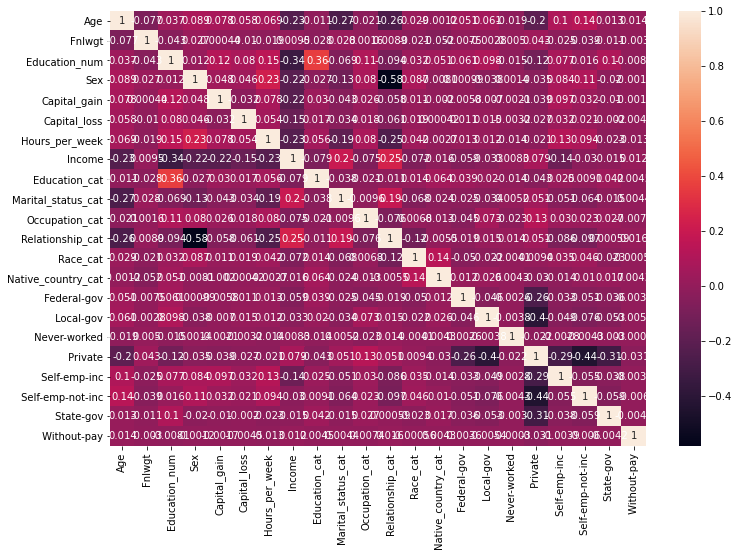

In [112]:
# Checking Corelation

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>,
        <AxesSubplot:title={'center':'Education_num'}>,
        <AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Capital_gain'}>],
       [<AxesSubplot:title={'center':'Capital_loss'}>,
        <AxesSubplot:title={'center':'Hours_per_week'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Education_cat'}>,
        <AxesSubplot:title={'center':'Marital_status_cat'}>],
       [<AxesSubplot:title={'center':'Occupation_cat'}>,
        <AxesSubplot:title={'center':'Relationship_cat'}>,
        <AxesSubplot:title={'center':'Race_cat'}>,
        <AxesSubplot:title={'center':'Native_country_cat'}>,
        <AxesSubplot:title={'center':' Federal-gov'}>],
       [<AxesSubplot:title={'center':' Local-gov'}>,
        <AxesSubplot:title={'center':' Never-worked'}>,
        <AxesSubplot:title={'center':' Private'}>,
        <AxesSubplot:tit

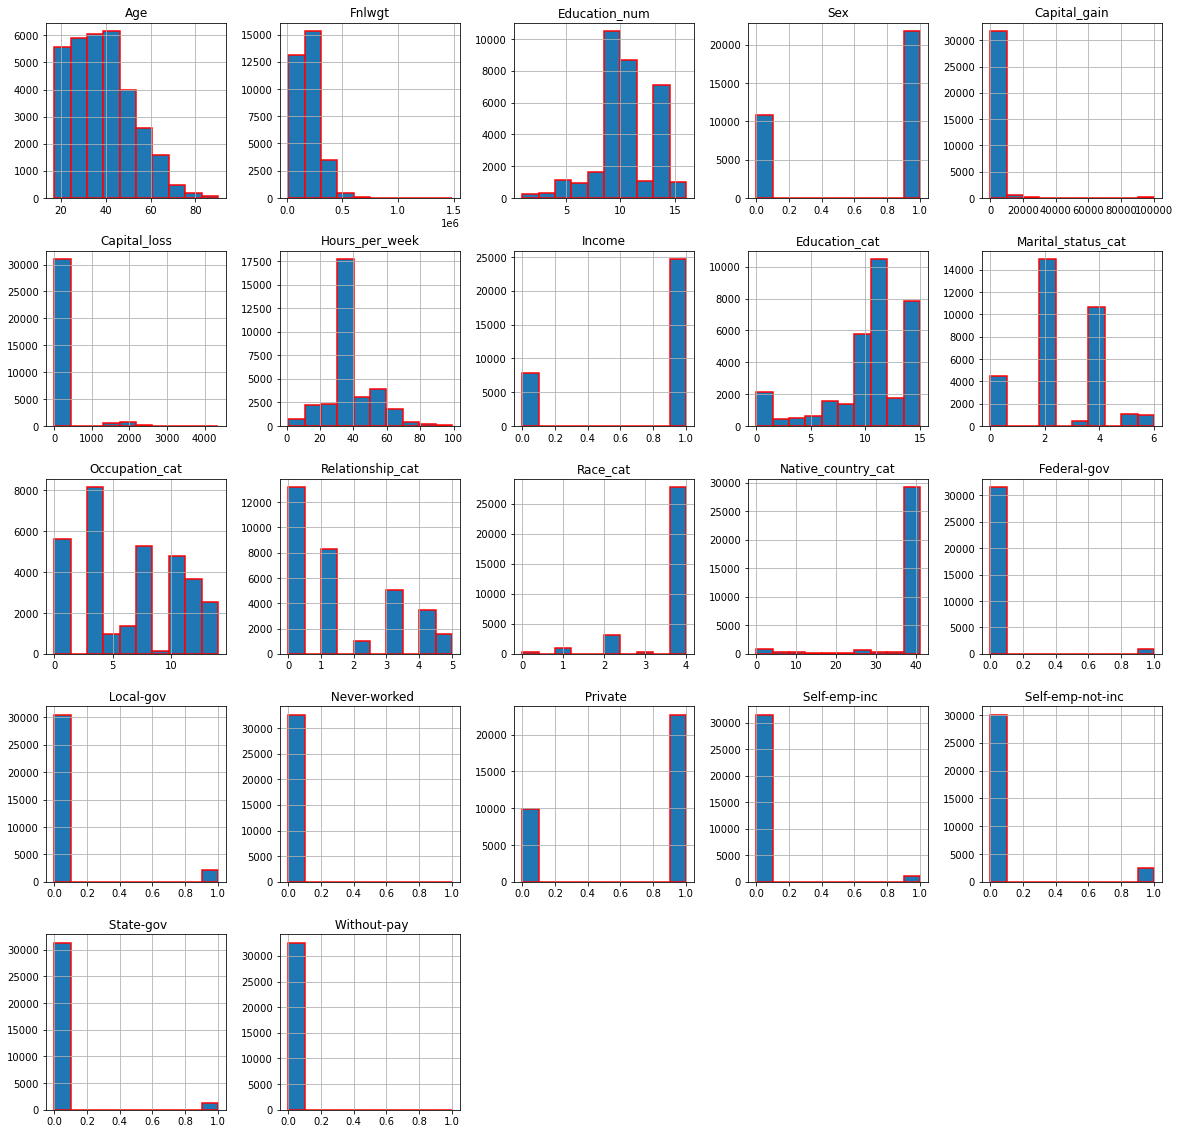

In [113]:
df.hist(edgecolor='red',linewidth=1.5,figsize=(20,20))

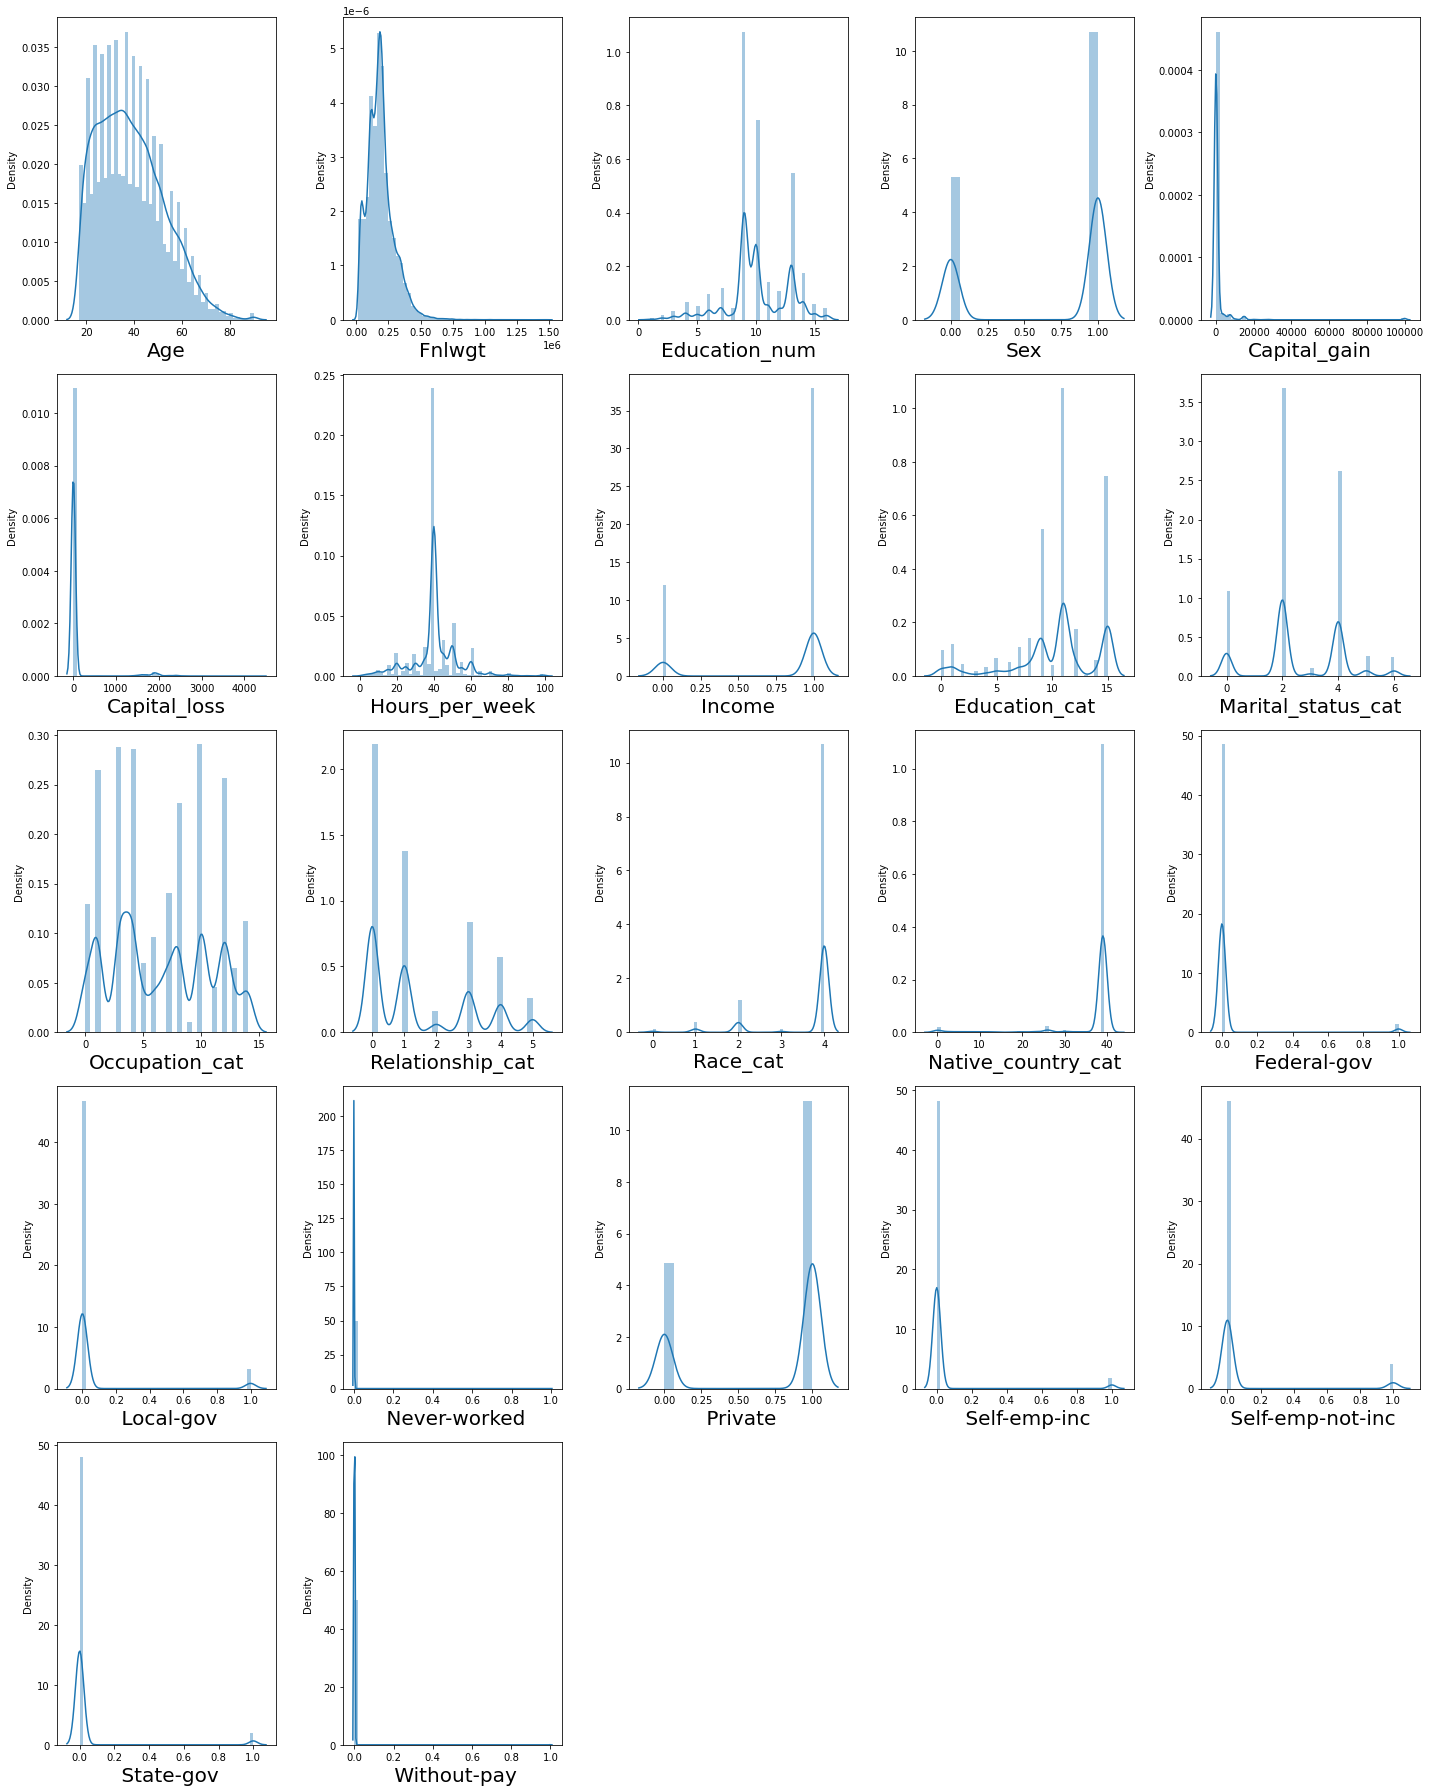

In [114]:
# Let's see how data is distributed for every column

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=22:
        ax = plt.subplot(5,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()      
        

In [115]:
# Now Dataset is ready for use
# Splitting train and test data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [116]:
x=df.drop('Income',axis=1)
x.head()

,Age,Fnlwgt,Education_num,Sex,Capital_gain,Capital_loss,Hours_per_week,Education_cat,Marital_status_cat,Occupation_cat,Relationship_cat,Race_cat,Native_country_cat,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,50,83311,13,1,0,0,13,9,2,4,0,4,39,0,0,0,0,0,1,0,0
1,38,215646,9,1,0,0,40,11,0,6,1,4,39,0,0,0,1,0,0,0,0
2,53,234721,7,1,0,0,40,1,2,6,0,2,39,0,0,0,1,0,0,0,0
3,28,338409,13,0,0,0,40,9,2,10,5,2,5,0,0,0,1,0,0,0,0
4,37,284582,14,0,0,0,40,12,2,4,5,4,39,0,0,0,1,0,0,0,0


In [117]:
y = df['Income']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Income, dtype: int64

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()

In [119]:
import warnings
warnings.simplefilter("ignore")

In [120]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,4)==round(accuracy_score(y_test,pred_test)*100,4):
        print("Best suitable Random state is: ",i)
        print("training Accuracy is: ",accuracy_score(y_train,pred_train)*100)
        print("testing accuracy is: ",accuracy_score(y_test,pred_test)*100)

In [121]:
# We are taking Random State as 810 as it gave no output

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=810,test_size=.020)

### Logistic Regression

In [122]:
lr.fit(x_train,y_train)

LogisticRegression()

In [123]:
lr.score(x_test,y_test)

0.7883435582822086

### Decision Tree

In [124]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [125]:
dt.score(x_test,y_test)

0.8067484662576687

In [ ]:
grid_param={'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']}

In [ ]:
grid_search=GridSearchCV(dt,grid_param,cv=5)

In [ ]:
grid_search.fit(x_train,y_train)

In [ ]:
best_param=grid_search.best_params_
print(best_param)

In [ ]:
dtn= DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_leaf=9,min_samples_split=5,splitter='random')

In [ ]:
dtn.fit(x_train,y_train)
dtn.score(x_test,y_test)

### Random Forest

In [129]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()

In [130]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [131]:
rf.score(x_test,y_test)

0.8466257668711656

In [132]:
param_grid ={'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,2),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'n_estimators':[100,200,300]
}


In [133]:
grid_searchrf = GridSearchCV(rf,param_grid=param_grid,cv=4)

In [ ]:
grid_searchrf.fit(x_train,y_train)

In [ ]:
best_param= grid_searchrf.best_params_
print(best_param)

In [ ]:
rfn=RandomForestClassifier(criterion='entropy',max_depth=12,min_samples_leaf=1,min_samples_split=4)
rfn.fit(x_train,y_train)

In [ ]:
rfn.score(x_test,y_test)

__Our Random Forest model is performing well so we will use it for prediction. But hyperparamter tuning went for tooo long. Had to abort it.__

In [ ]:
import pickle
# Writing different model files to file
with open( 'Census_Income.sav', 'wb') as f:
    pickle.dump(rf,f)